In [5]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import os, sys
import seaborn as sns
import multiprocessing
%matplotlib inline

In [6]:
os.getcwd()
os.chdir('C:\\Users\\Ben\\Documents\\682_project')

In [7]:
with open('data/self_play/cm2_value_introspection.pickle', 'rb') as f:
        mem = pickle.load(f)

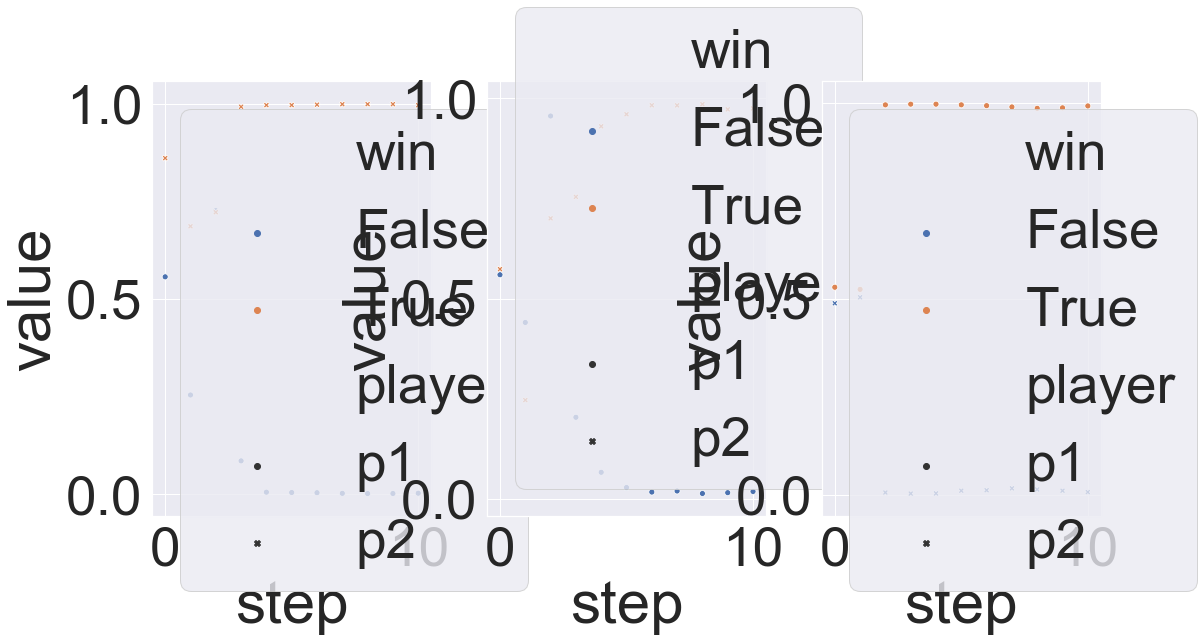

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(17, 8))
i = 0
all_df = None
for m in mem:
    if m['all_values'][0] == -1:
        continue
    p1_values = m['player1_values']
    p2_values = m['player2_values']
    winner = m['all_values'][0]
    agent_won = [winner == 1] * len(p1_values)
    agent_won.extend([winner == 0] * len(p2_values))
    player = ['p1'] * len(p1_values)
    player.extend(['p2'] * len(p2_values))
    step = list(range(len(p1_values)))
    step.extend(step)
    df = pd.DataFrame(dict(value=np.concatenate((p1_values, p2_values)),
                              step=step, player=player,
                              win=agent_won))
    df['game'] = i
    if all_df is None:
        all_df = df
    else:
        all_df = pd.concat([all_df, df])
    sns.scatterplot(x='step', y='value', hue='win', style='player', data=df, ax=ax[i])
    i += 1
    

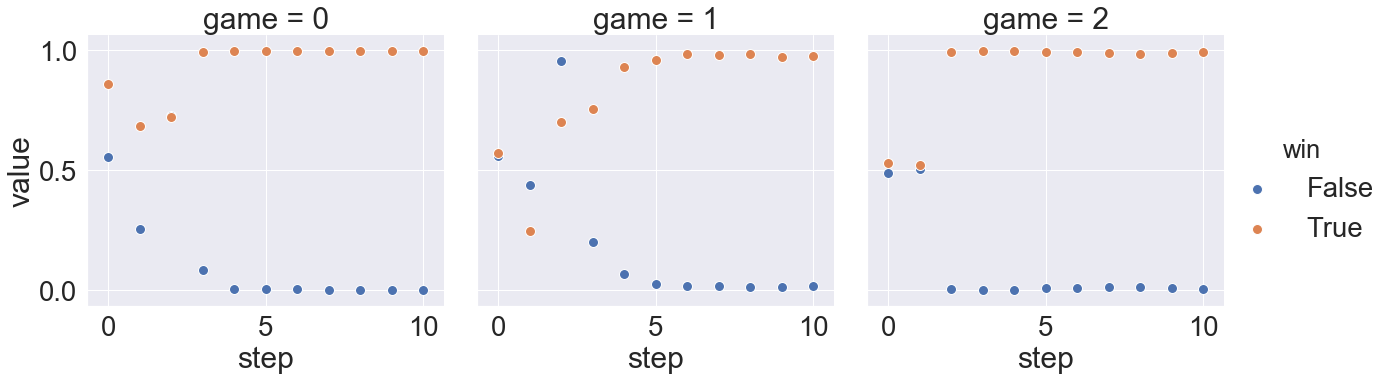

In [17]:
sns.set(font_scale=2.5)
g = sns.FacetGrid(all_df, col="game",  hue="win", height=6, aspect=1)
g = (g.map(plt.scatter, "step", "value", edgecolor="w", s=100).add_legend())
plt.savefig('value_head.png')

In [19]:
mem[3]

{'all_actions': [5,
  65,
  72,
  110,
  111,
  27,
  63,
  17,
  76,
  116,
  66,
  46,
  75,
  39,
  6,
  53,
  85,
  40,
  42,
  58,
  82,
  30,
  30],
 'all_states': [array([0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2.,
         2., 2., 2., 2., 2., 2., 2., 1.]),
  array([0., 5., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2.,
         2., 2., 2., 2., 2., 2., 2., 1.]),
  array([ 0.,  5.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,
         65.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.]),
  array([ 0.,  5., 72.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,
         65.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.]),
  array([  0.,   5.,  72.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,
           2.,   1.,  65., 110.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,
           2.,   2.,   1.]),
  array([  0.,   5.,  72., 111.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,
           2.,   1.,  65., 110.,   2.,   2.,   